# **BFS con detallitos extras**



# *Ejecutar en orden 

In [3]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git

Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 268, done.
remote: Counting objects: 100% (268/268), done.
remote: Compressing objects: 100% (263/263), done.
remote: Total 268 (delta 150), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (268/268), 274.11 KiB | 8.31 MiB/s, done.
Resolving deltas: 100% (150/150), done.


In [5]:
from algorithmic_complexity.aclib import graphstuff as gs

In [6]:
import pandas as pd
import numpy as np
import networkx as nx
import math
import sys
from collections import defaultdict
from pprint import pprint 
from algorithmic_complexity.aclib import graphstuff as gs

In [7]:
url="https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity/main/data/poblaciones.csv"
poblacionesDF = pd.read_csv(url)

**Operaciones a usar:** Calculo de Distancia

In [9]:
def dist(cp1, cp2):
  x1, y1 = float(cp1['LATITUD']), float(cp1['LONGITUD'])
  x2, y2 = float(cp2['LATITUD']), float(cp2['LONGITUD'])

  return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

**Reconocimiento de datos por segmento**

In [10]:
nomprovincias = poblacionesDF['PROVINCIA'].unique()

In [11]:
provincias = dict()
for nom in nomprovincias:
  provincias[nom] = poblacionesDF[poblacionesDF['PROVINCIA'] == nom]

In [12]:
nomdistritos = poblacionesDF['DISTRITO'].unique()

In [13]:
distritos = dict()
for nom in nomdistritos:
  distritos[nom] = poblacionesDF[poblacionesDF['DISTRITO'] == nom]

**Ingreso de Datos**

In [14]:
#@title Provincia 

#@markdown Punto de Partida
no_type_checking = ''
punto_partida_provincia = 'UTCUBAMBA' #@param {type:"string"}
punto_partida_distrito = 'CUMBA' #@param {type:"string"}
punto_partida_centro_poblado = 'CHALA' #@param {type:"string"}
#@markdown Punto Destino
punto_destino_provincia = 'CHICLAYO' #@param {type:"string"}
punto_destino_distrito = 'PICSI' #@param {type:"string"}
punto_destino_centro_poblado = 'LA PARRA' #@param {type:"string"}

In [40]:
nomdistritos_partida = provincias[punto_partida_provincia]['DISTRITO'].unique()
print(len(nomdistritos_partida))

nomdistritos_llegada = provincias[punto_destino_provincia]['DISTRITO'].unique()
print(len(nomdistritos_llegada))
nomdistritos_llegada

nomdistritos = np.hstack((nomdistritos_partida,nomdistritos_llegada))
print(nomdistritos)

5
16
['CAJARURO' 'CUMBA' 'EL MILAGRO' 'JAMALCA' 'LONYA GRANDE' 'CAYALTI'
 'CHICLAYO' 'CHONGOYAPE' 'ETEN' 'JOSE LEONARDO ORTIZ' 'LAGUNAS' 'MONSEFU'
 'NUEVA ARICA' 'OYOTUN' 'PATAPO' 'PICSI' 'POMALCA' 'PUCALA' 'REQUE' 'SAÑA'
 'TUMAN']


In [39]:
distrito_partida = distritos[punto_partida_distrito]
distrito_llegada = distritos[punto_destino_distrito]

conjunto_distrito = pd.concat([distrito_partida,distrito_llegada])
print(conjunto_distrito)

     DEPARTAMENTO  PROVINCIA DISTRITO  ...    LONGITUD  NMI1  NMI2
14       AMAZONAS  UTCUBAMBA    CUMBA  ...  -78.619398     1     1
15       AMAZONAS  UTCUBAMBA    CUMBA  ...  -78.633153     1     6
16       AMAZONAS  UTCUBAMBA    CUMBA  ...  -78.687223     1     4
17       AMAZONAS  UTCUBAMBA    CUMBA  ...  -78.630186   202   562
1656   LAMBAYEQUE   CHICLAYO    PICSI  ...  -79.813576   440  1763
1657   LAMBAYEQUE   CHICLAYO    PICSI  ...  -79.847292    12    51
1658   LAMBAYEQUE   CHICLAYO    PICSI  ...  -79.811867    13    42
1659   LAMBAYEQUE   CHICLAYO    PICSI  ...  -79.834138    48   208
1660   LAMBAYEQUE   CHICLAYO    PICSI  ...  -79.788555    15    62
1661   LAMBAYEQUE   CHICLAYO    PICSI  ...  -79.753165    14    54
1662   LAMBAYEQUE   CHICLAYO    PICSI  ...  -79.805185    42   157
1663   LAMBAYEQUE   CHICLAYO    PICSI  ...   -79.81087    35   155
1664   LAMBAYEQUE   CHICLAYO    PICSI  ...  -79.801702    10    39
1665   LAMBAYEQUE   CHICLAYO    PICSI  ...  -79.776168     2  

**Matrix Adapter**

In [17]:
vector = []
destinies = []

In [19]:
G = nx.Graph()
col = 'CENTRO POBLADO'
n = 0
z = 0
b = 0
for i, cp1 in conjunto_distrito.iterrows():
  destinies.append(cp1[col])

for i, cp1 in conjunto_distrito.iterrows():
  b = 0
  for j, cp2 in conjunto_distrito.iterrows():
    if cp1[col] != cp2[col]:
      b = b + 1
      G.add_edge(cp1[col], cp2[col], weight=dist(cp1, cp2))
      vector.append([destinies.index(cp1[col]),destinies.index(cp2[col]),dist(cp1, cp2)])
      n = n + 1
  z = z + 1 

**Testeo de arreglos**

In [56]:
print(destinies)
print(vector)

['AGUA AZUL', 'CHALA', 'PUERTO CHOROS', 'TAGTAGO', 'CAPOTE', 'CARTAGENA', 'COLLOSI', 'EL FAICALITO', 'EL MANGO', 'EL MEDANO', 'HORCON I', 'HORCON II', 'LA GARITA', 'LA PARRA', 'LA PLUMA', 'LOS PLATANOS', 'MORROPILLO', 'PANCAL', 'PICSI', 'RIO I', 'RIO II', 'SAN JOSE', 'SAN JUAN', 'SAN MIGUEL', 'AGUA AZUL', 'CHALA', 'PUERTO CHOROS', 'TAGTAGO', 'CAPOTE', 'CARTAGENA', 'COLLOSI', 'EL FAICALITO', 'EL MANGO', 'EL MEDANO', 'HORCON I', 'HORCON II', 'LA GARITA', 'LA PARRA', 'LA PLUMA', 'LOS PLATANOS', 'MORROPILLO', 'PANCAL', 'PICSI', 'RIO I', 'RIO II', 'SAN JOSE', 'SAN JUAN', 'SAN MIGUEL']
[[0, 1, 0.014402531895458506], [0, 2, 0.10111394903276143], [0, 3, 0.015950546855822978], [0, 4, 1.40745449905849], [0, 5, 1.4238382068075648], [0, 6, 1.4182716767848138], [0, 7, 1.4092953986474874], [0, 8, 1.3818216407890695], [0, 9, 1.341200391238379], [0, 10, 1.391249624983949], [0, 11, 1.3940777891900358], [0, 12, 1.410283398335244], [0, 13, 1.3709241858921257], [0, 14, 1.3672122272438174], [0, 15, 1.39862

**BFS con detallitos extras**

In [58]:
class bfs:
    def shortestDistance(self, n, routes, src, dst, K):
        
        # n es la cantidad de elementos
        # routes la matriz de datos convertido a [x1: punto partida,y1: punto destino, z1: distancia entre x1 e y1] y asi con cada nodo
        # src es el punto de partida
        # dst es el punto de destino final
        # K es la cantidad de paradas que se pueden dar (de preferencia usar el valor de 'n' y asi encontrar el valor mas corto)

        # Construccion de la estructura de lista de adyacencia por orden trasversal 
        # Tomar en cuenta que la matriz se maneja por números, debido a ello se hizo una conversión de los destinos a un valor único por búsqueda
        adj_list = defaultdict(list)
        for s, d, distance in routes:
            adj_list[s].append((d, distance)) 
        
        # Se empieza por el nodo indicado en atributos y se le coloca 0 como distancia inicial
        min_distance = {k: float("inf") for k in range(n)}
        min_distance[src] = 0
        queue = [src]
        stops = 0
        
        # El buscador funciona hasta que se llene la cola con las paradas indicadas por nodos
        while queue:
            size = len(queue)
            for _ in range(size):
                element = queue.pop(0)
                # Si sale de la cola quiere decir que es un posible camino minimo  
                distance = min_distance[element]
                
                # Se analiza los nodos adyacentes
                if element in adj_list:
                    for neighbour, direct_route_distance in adj_list[element]:
                        
                        # En caso de que exista una posible mejora se vuelve a colocar en la cola para otra evaluación
                        if  direct_route_distance + distance <  min_distance[neighbour]:
                            min_distance[neighbour] = direct_route_distance + distance
                            queue.append(neighbour)
                            
            # Incrementar nivel y seguir buscando el camino minimo o en caso ya este el valor retornar el valor minimo            
            stops += 1                
        return print('No existe camino') if min_distance[dst] == float("inf") else  print('La distancia más corta a recorrer es: ', min_distance[dst])  

**Prueba**

In [59]:
minimum = bfs()
minimum.shortestDistance(int(conjunto_distrito.size/8),vector,destinies.index(punto_partida_centro_poblado),destinies.index(punto_destino_centro_poblado),int(conjunto_distrito.size/8))

La distancia más corta a recorrer es:  1.3570315313245351


**Gráfico**

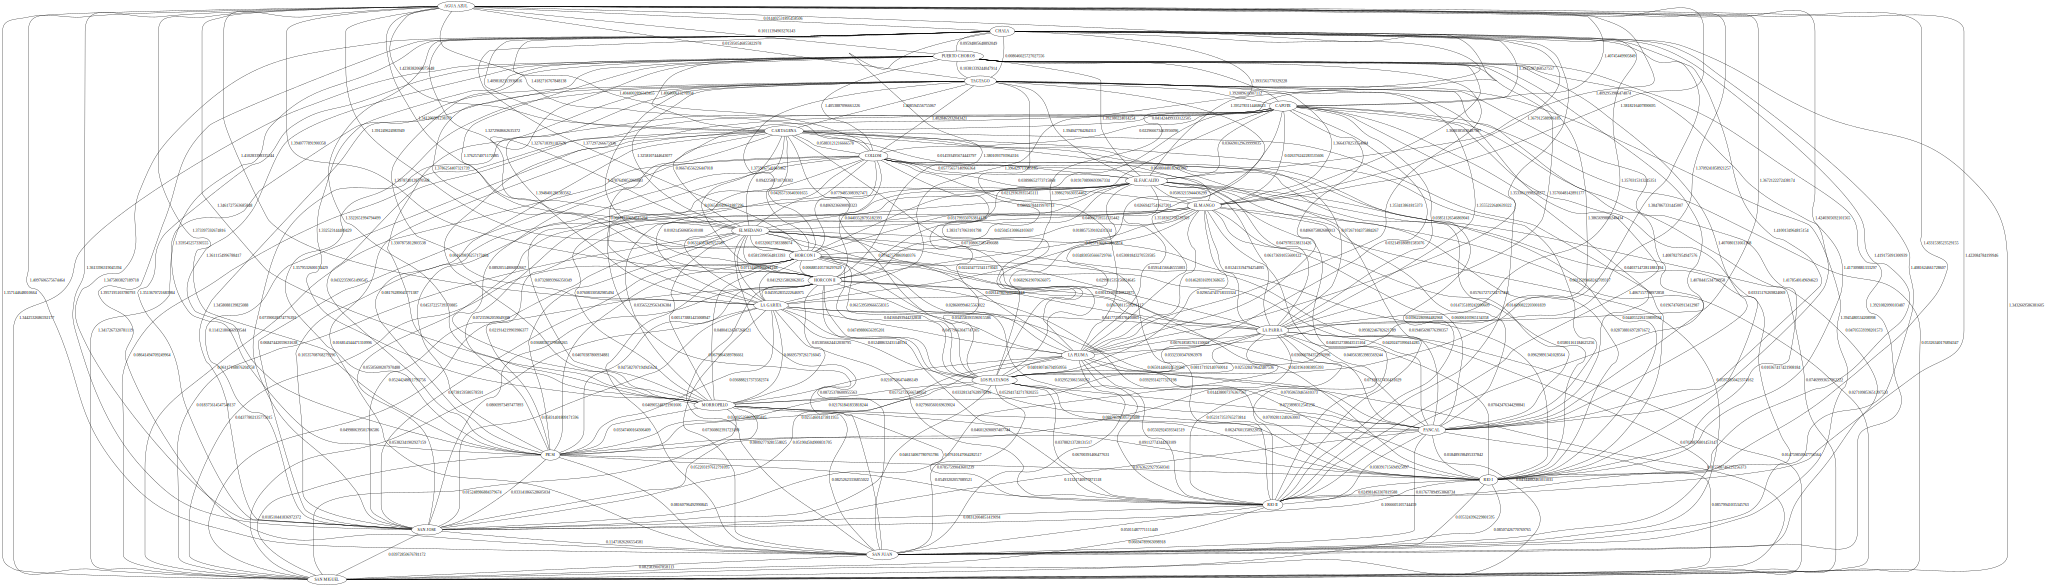

In [46]:
gs.nx2gv(G, weighted=True, params={'size':'50'})